In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.models import load_model
from itertools import chain

pd.options.mode.chained_assignment = None  # default='warn'

In [25]:
exoTrain = pd.read_csv('/Volumes/RGHardDrive/2025-2026 raghavscifair/Project/exoTrain.csv')
exoTest = pd.read_csv('/Volumes/RGHardDrive/2025-2026 raghavscifair/Project/exoTest.csv')

exoTrain.tail(5)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
5082,1,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,1,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,1,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,1,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55
5086,1,323.28,306.36,293.16,287.67,249.89,218.30,188.86,178.93,118.93,...,71.19,0.97,55.20,-1.63,-5.50,-25.33,-41.31,-16.72,-14.09,27.82


In [26]:
exoTest.tail(5)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
565,1,374.46,326.06,319.87,338.23,251.54,209.84,186.35,167.46,135.45,...,-123.55,-166.90,-222.44,-209.71,-180.16,-166.83,-235.66,-213.63,-205.99,-194.07
566,1,-0.36,4.96,6.25,4.20,8.26,-9.53,-10.10,-4.54,-11.55,...,-12.40,-5.99,-17.94,-11.96,-12.11,-13.68,-3.59,-5.32,-10.98,-11.24
567,1,-54.01,-44.13,-41.23,-42.82,-39.47,-24.88,-31.14,-24.71,-13.12,...,-0.73,-1.64,1.58,-4.82,-11.93,-17.14,-4.25,5.47,14.46,18.70
568,1,91.36,85.60,48.81,48.69,70.05,22.30,11.63,37.86,28.27,...,2.44,11.53,-16.42,-17.86,21.10,-10.25,-37.06,-8.43,-6.48,17.60
569,1,3071.19,2782.53,2608.69,2325.47,2089.37,1769.56,1421.09,1142.09,902.31,...,695.41,865.97,882.41,1203.06,1293.03,1354.41,-192.81,-277.22,-69.63,121.56


In [27]:
print(exoTrain['LABEL'].value_counts())
print(exoTest['LABEL'].value_counts())

1    5050
2      37
Name: LABEL, dtype: int64
1    565
2      5
Name: LABEL, dtype: int64


In [28]:
def flux_graph(dataset, row, dataframe, planet):
    if dataframe:
        fig = plt.figure(figsize=(20,5))
        ax = fig.add_subplot()
        ax.set_title(planet, color='black', fontsize=22)
        ax.set_xlabel('time', color='black', fontsize=18)
        ax.set_ylabel('flux_' + str(row), color='black', fontsize=18)
        ax.grid(False)
        flux_time = list(dataset.columns)
        flux_values = dataset[flux_time].iloc[row]
        ax.plot([i + 1 for i in range(dataset.shape[1])], flux_values, 'black')
        ax.tick_params(colors = 'black', labelcolor='black', labelsize=14)
        plt.show()
    else:
        fig = plt.figure(figsize=(20,5))
        ax = fig.add_subplot()
        
        ax.set_title(planet, color='black', fontsize=22)
        ax.set_xlabel('time', color='black', fontsize=18)
        ax.set_ylabel('flux_' + str(row), color='white', fontsize=18)
        ax.grid(False)
        flux_values = dataset[row]
        ax.plot([i + 1 for i in range(dataset.shape[1])], flux_values, 'black')
        ax.tick_params(colors = 'black', labelcolor='black', labelsize=14)
        plt.show()

In [29]:
def show_graph(dataframe, dataset):
    with_planet = exoTrain[exoTrain['LABEL'] == 2].head(3).index
    wo_planet = exoTrain[exoTrain['LABEL'] == 1].head(3).index

    for row in with_planet:
        flux_graph(dataset, row, dataframe, planet = 'periodic dip due to transiting planet')
    for row in wo_planet:
        flux_graph(dataset, row, dataframe, planet = 'no transiting planet')

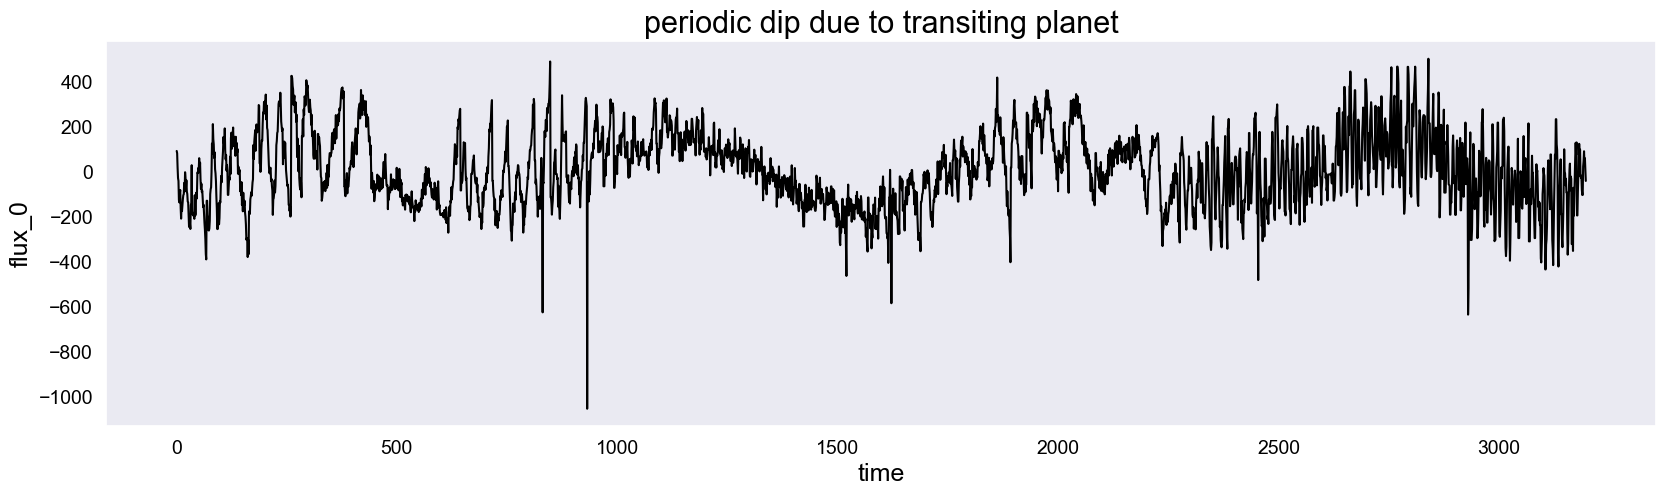

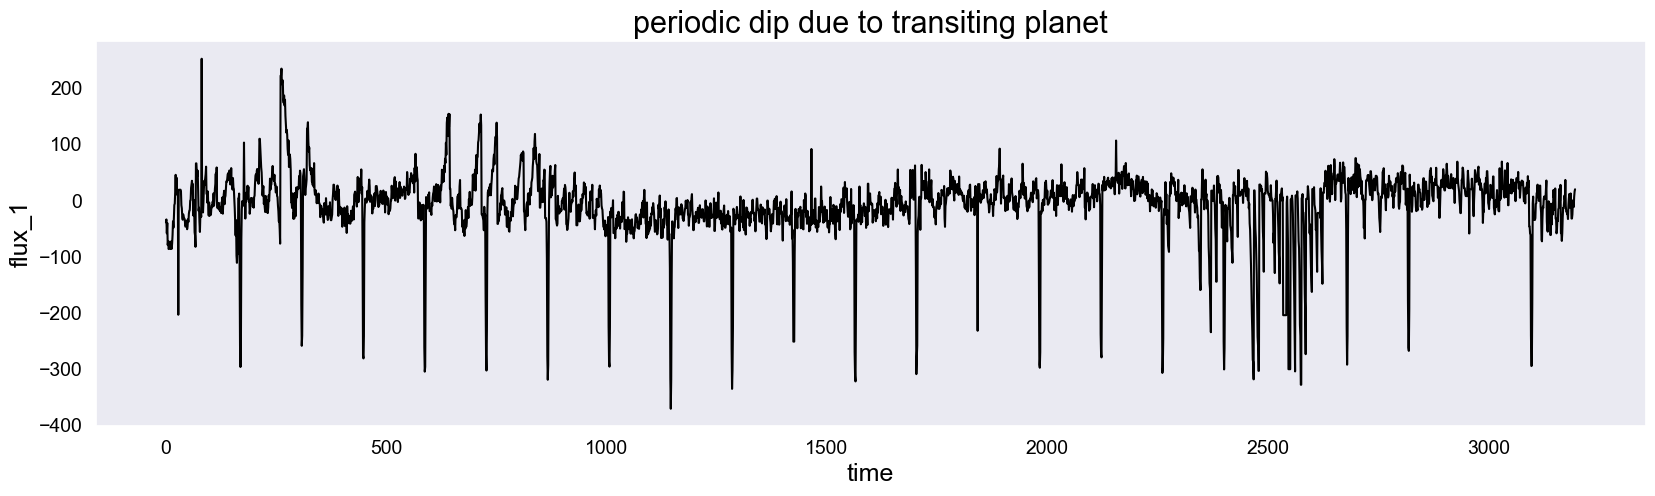

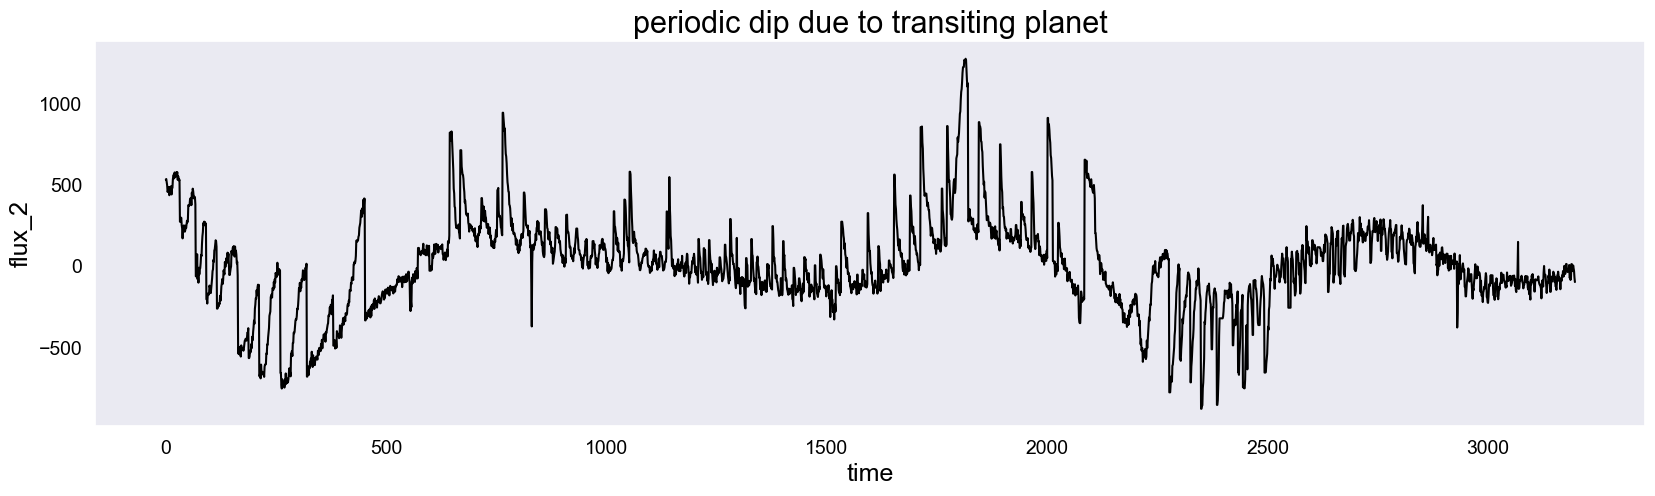

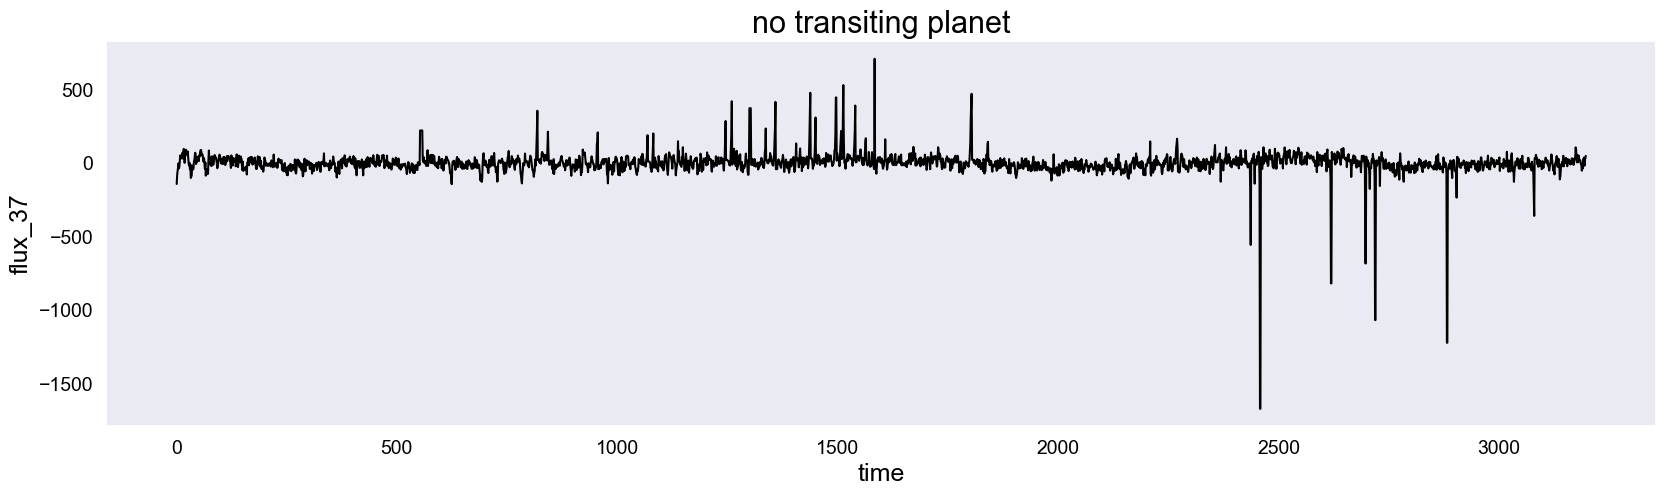

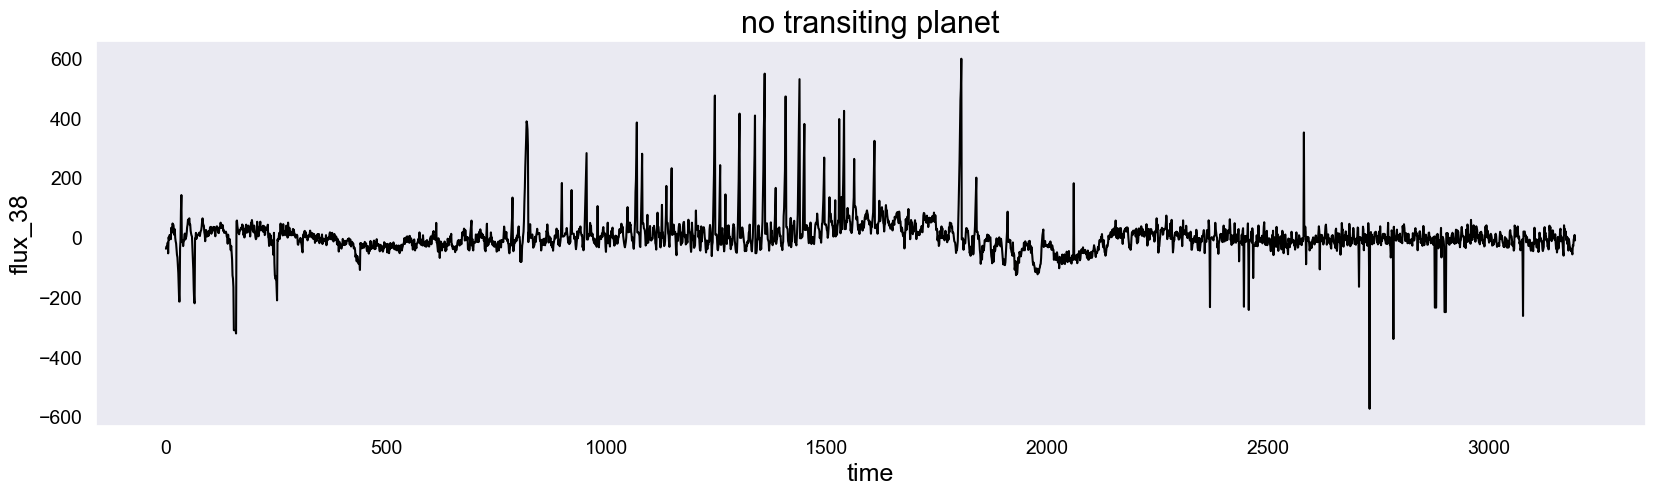

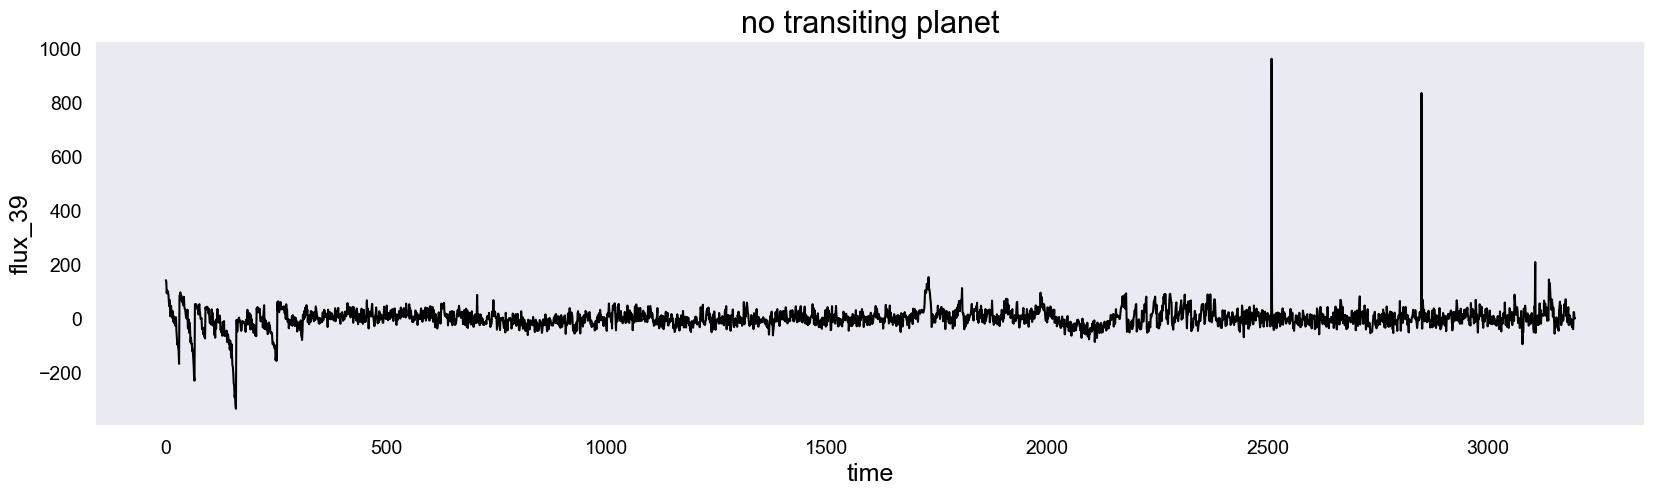

In [30]:
show_graph(True, dataset = exoTrain.loc[:, exoTrain.columns != 'LABEL'])

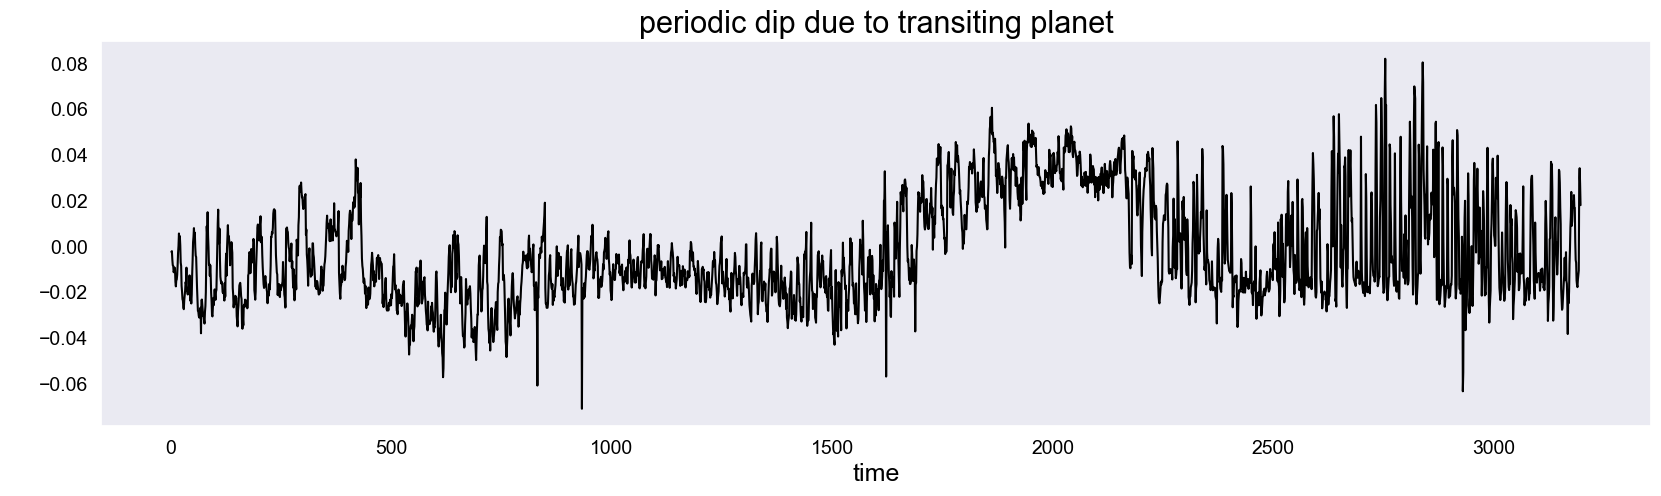

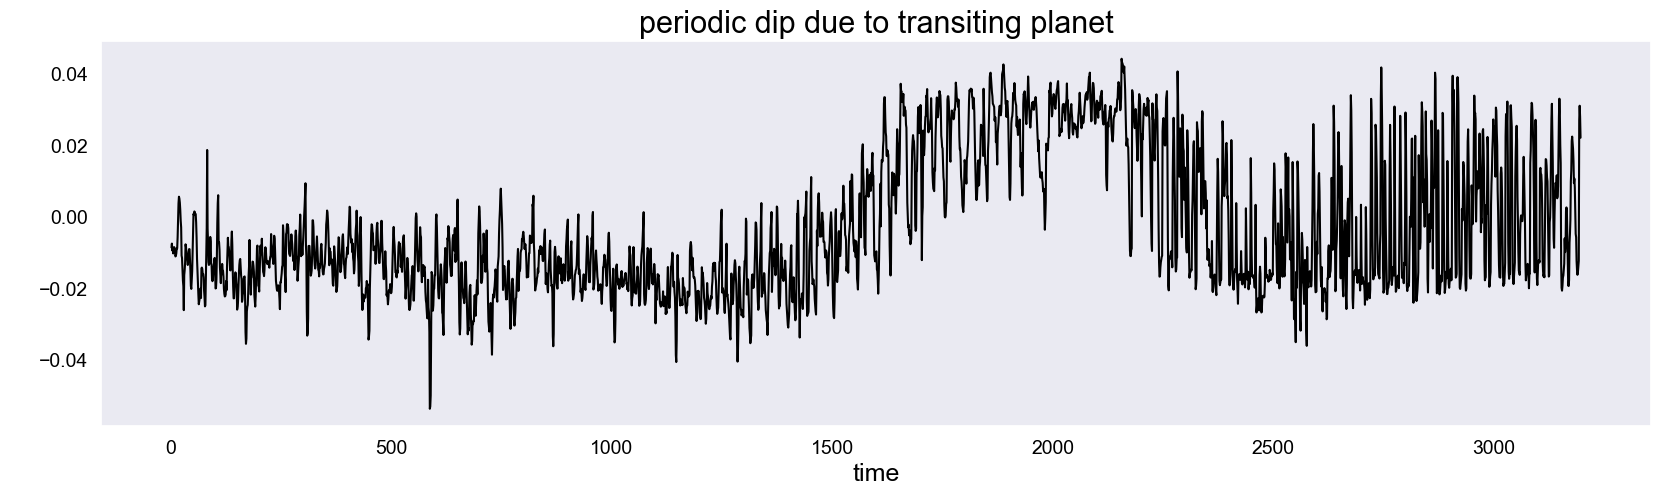

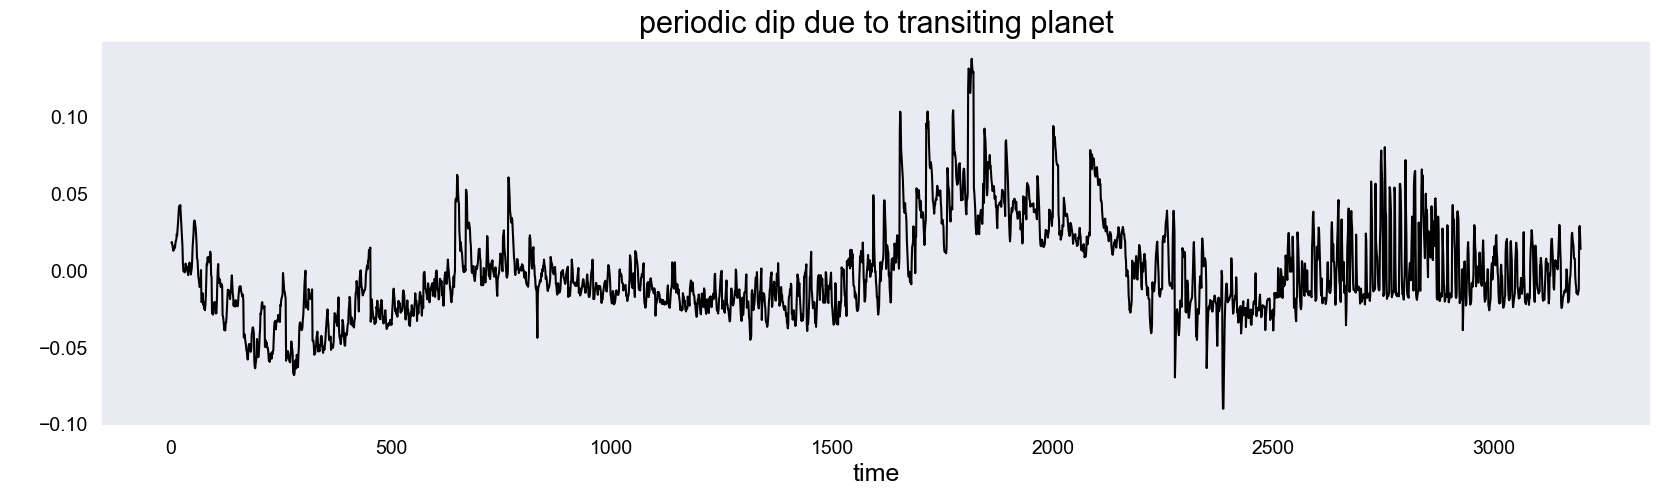

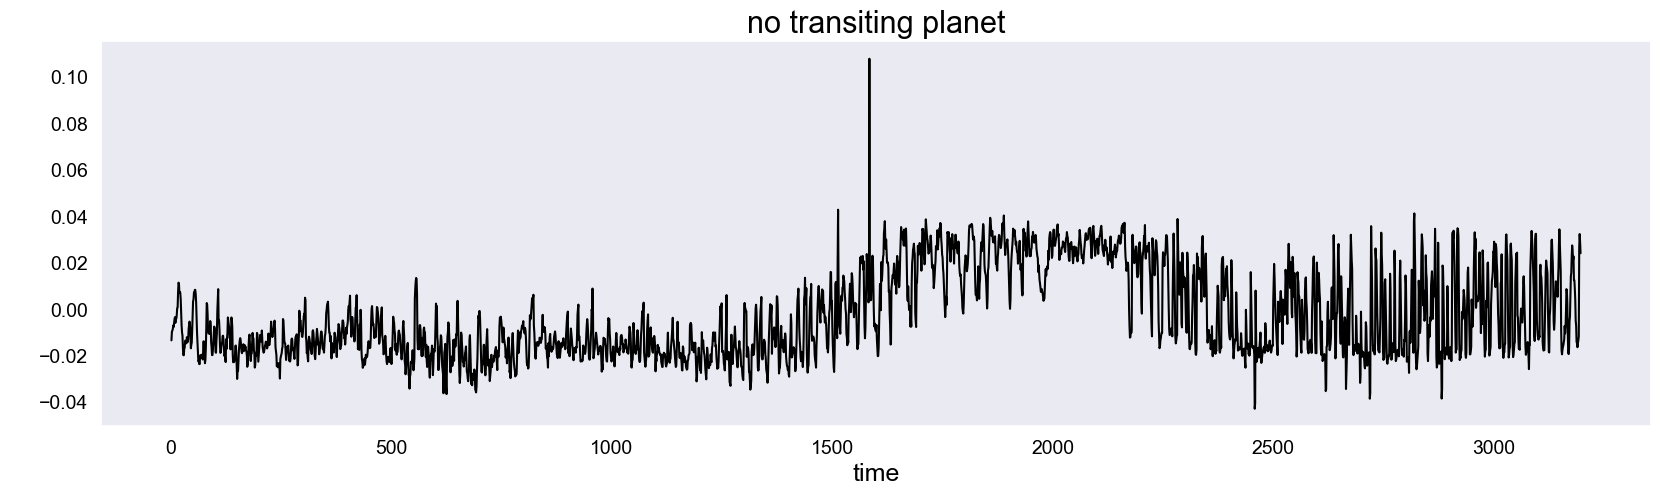

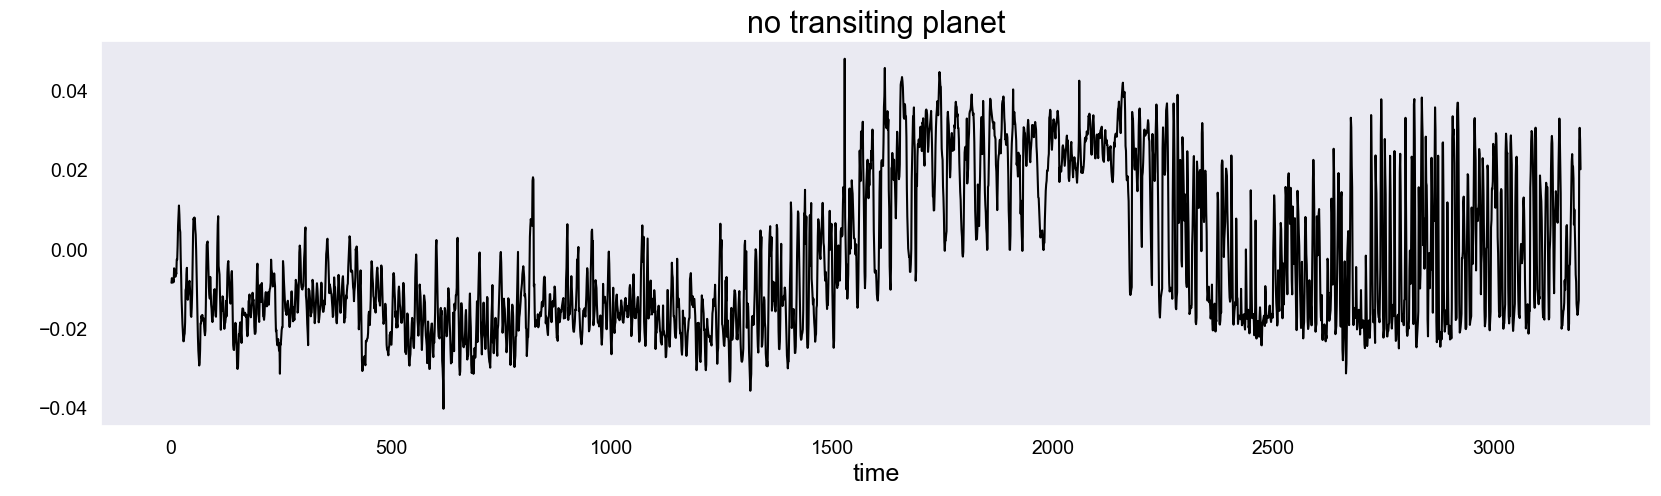

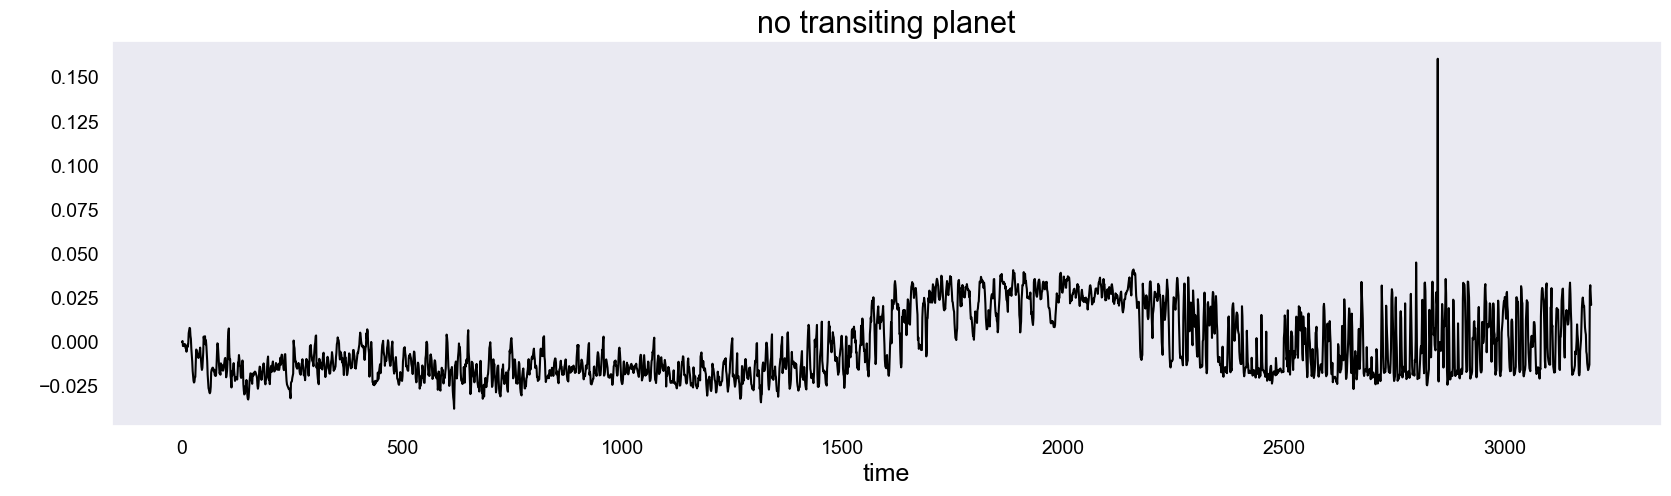

In [31]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(exoTrain.loc[:, exoTrain.columns != 'LABEL'])
show_graph(False, scaled_data)

In [32]:
def handle_outliers(dataset, num_iterations):
    
    #threshold = None
    dataset_handled = dataset

    for n in range(num_iterations):
        #for column in range(dataset_handled.shape[0]):
        for index, row in dataset_handled.iterrows():
            row_values = row.values
            row_max, row_min = row_values.max(), row_values.min()
            row_maxidx, row_minidx = row_values.argmax(), row_values.argmin()
            row_mean = row_values.mean()

            #if np.abs(column_max/column_mean) >= threshold:
            dataset_handled.iloc[index][row_maxidx] = row_mean

            #if np.abs(column_min/column_mean) >= threshold:
            dataset_handled.iloc[index][row_minidx] = row_mean

    return dataset_handled

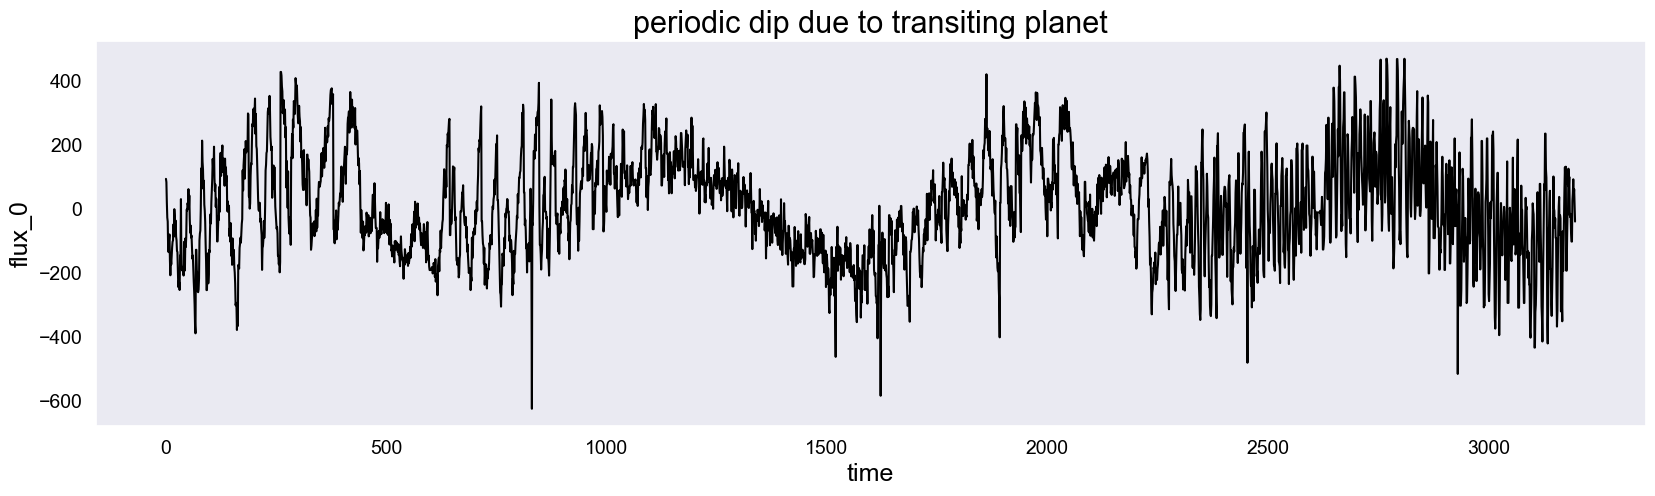

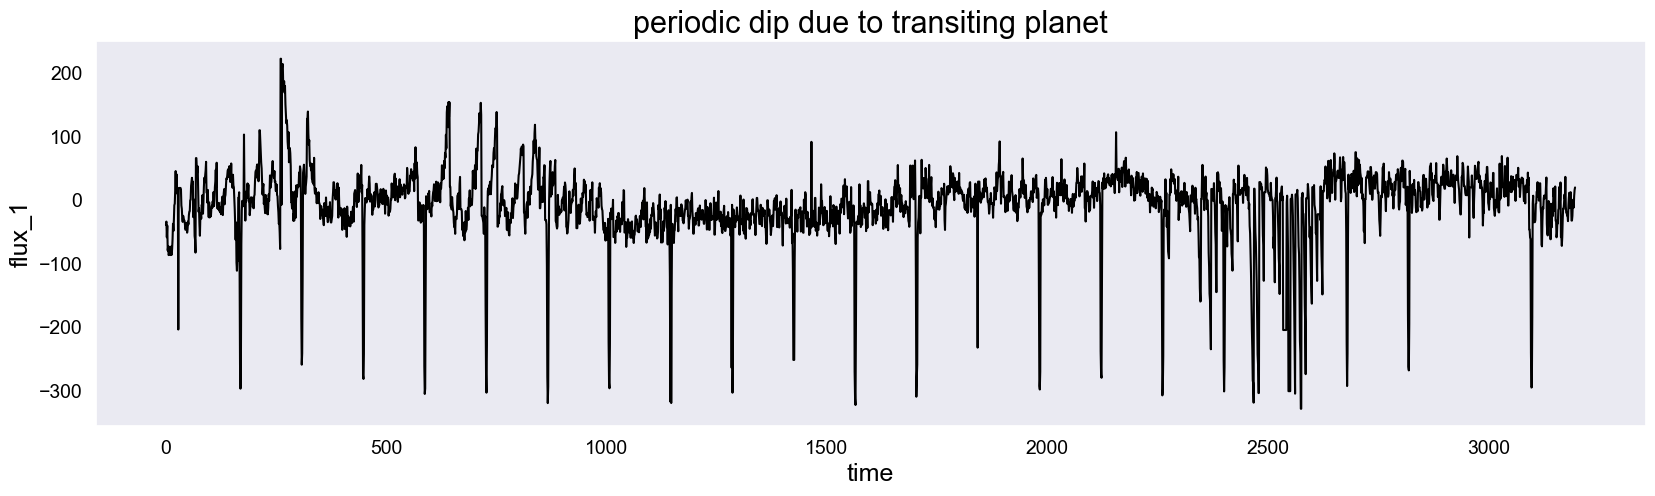

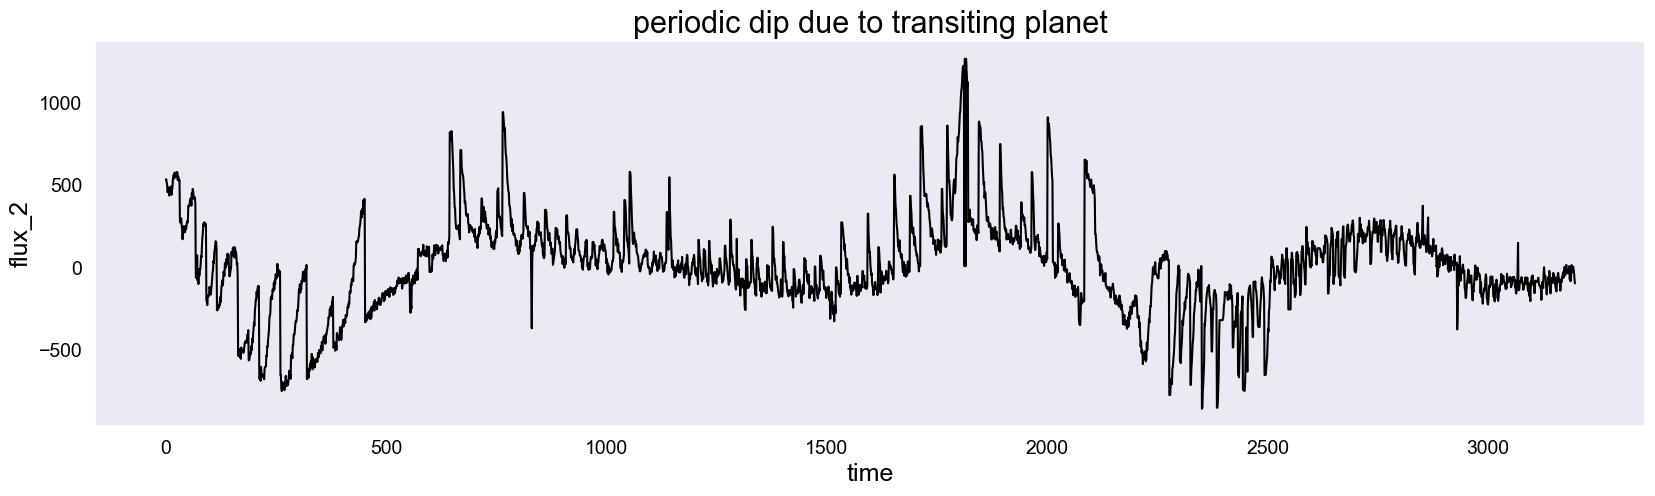

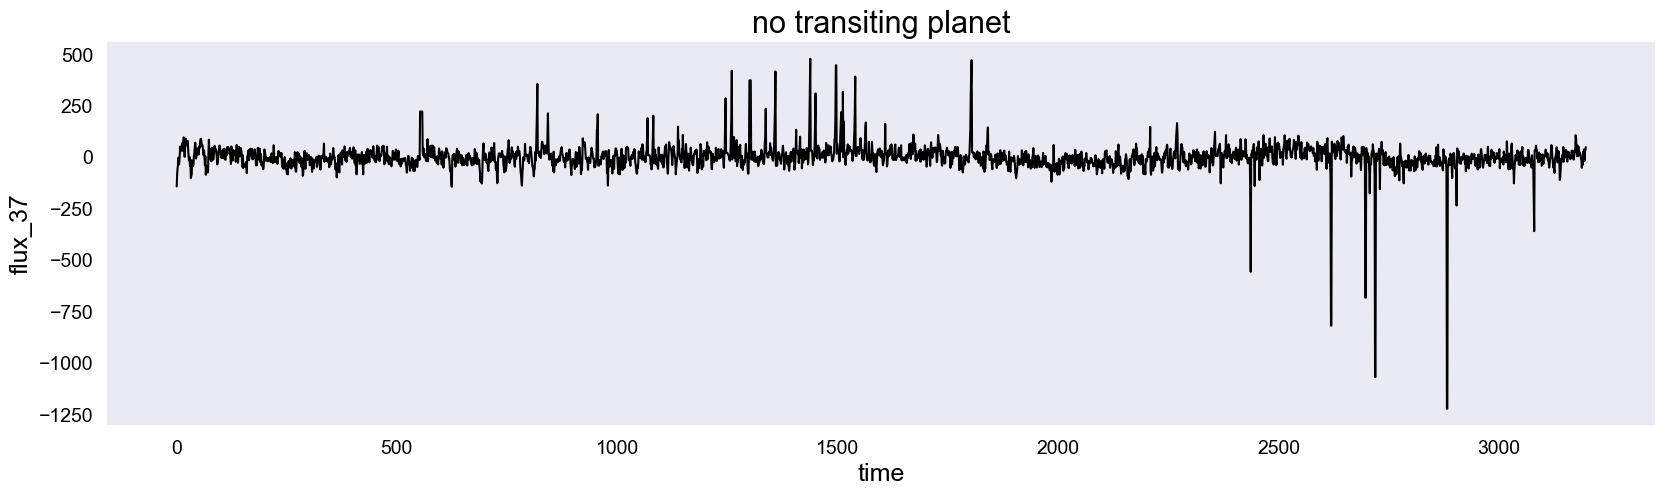

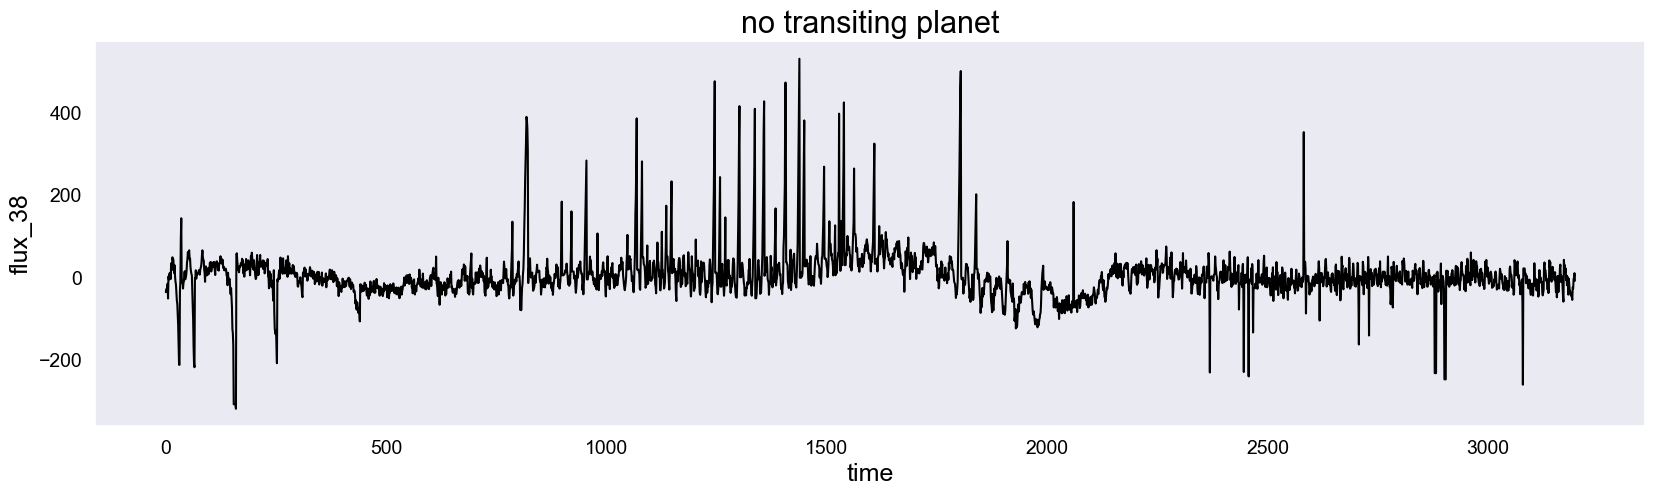

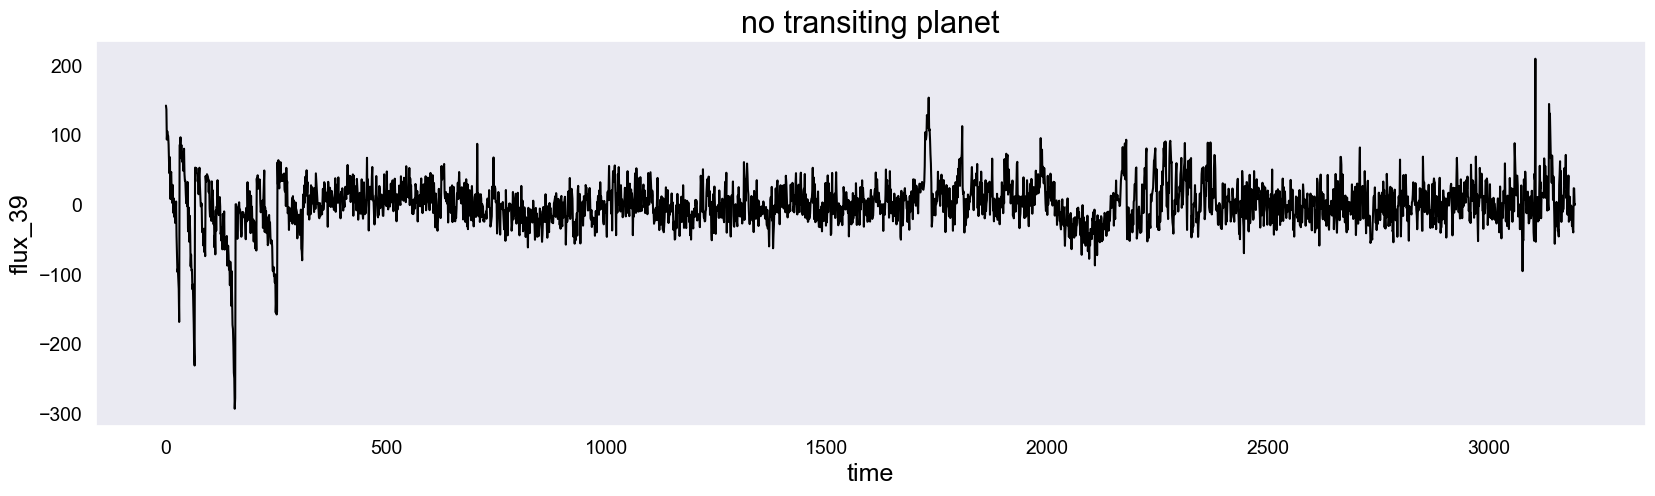

In [33]:
handled_dataset = handle_outliers(exoTrain.loc[:, exoTrain.columns != 'LABEL'], 2)
show_graph(True, handled_dataset)

In [34]:
def lable_change(y_train, y_test):
    labler = lambda x: 1 if x == 2 else 0
    y_train_01, y_test_01 = y_train.apply(labler), y_test.apply(labler)

    return y_train_01, y_test_01

In [35]:
def smote(x_train, y_train):
    #smote = SMOTE(random_state=17, sampling_strategy='minority')
    over = SMOTE(sampling_strategy=0.2)
    under = RandomUnderSampler(sampling_strategy=0.3)
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)
    x_train_res, y_train_res = pipeline.fit_resample(x_train, y_train)

    return x_train_res, y_train_res

In [36]:
y_smote_test = exoTrain.loc[:, 'LABEL']
print(y_smote_test.value_counts())
_, y_smote_test = smote(handled_dataset, y_smote_test)
print(y_smote_test.value_counts())

1    5050
2      37
Name: LABEL, dtype: int64
1    3366
2    1010
Name: LABEL, dtype: int64


In [37]:
# Define training and testing datasets
def datasets():
    x_train, y_train = exoTrain.loc[:, exoTrain.columns != 'LABEL'], exoTrain.loc[:, 'LABEL']
    x_test, y_test = exoTest.loc[:, exoTest.columns != 'LABEL'], exoTest.loc[:, 'LABEL']
    
    #fill NaNs with mean (no NaNs)
    #for column in x_train:
        #x_train[column] = x_train[column].fillna(round(x_train[column].mean(), 2))

    #x_train, x_test = scale(x_train, x_test)
    x_train = handle_outliers(x_train, 2)
    x_train, y_train = smote(x_train, y_train)
    y_train, y_test = lable_change(y_train, y_test)

    n_features = x_train.shape[1]

    return x_train, y_train, x_test, y_test, n_features
#

In [38]:
# Graph train and test accuracy
def graph_acc(history):
    # Plot loss during training
    plt.subplot(211)
    plt.title('Loss')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='test')
    plt.legend()

    # Plot accuracy during training
    plt.subplot(212)
    plt.title('Accuracy')
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.legend()
    plt.show()

In [39]:
# Confusion matrix
def conf_matrix(y_test, y_pred):

    matrix = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(matrix, columns=[0, 1], index = [0, 1])
    df_cm.index.name = 'Truth'
    df_cm.columns.name = 'Predicted'
    plt.figure(figsize = (10,7))
    sn.set(font_scale=1.4) 
    sn.heatmap(df_cm, cmap="BuGn", annot=True, annot_kws={"size": 16})
    plt.show()
    
    return matrix

In [40]:
# Print prediction metrics
def prediction_metrics(y_test, y_pred, y_class_pred, matrix):
    FP = matrix[0][1] 
    FN = matrix[1][0]
    TP = matrix[1][1]
    TN = matrix[0][0]

    sens = TP/(TP+FN)
    spec = TN/(TN+FP) 
    g_mean = np.sqrt(sens * spec)

    accuracy = accuracy_score(y_test, y_class_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_class_pred)
    precision = precision_score(y_test, y_class_pred)
    recall = recall_score(y_test, y_class_pred)
    f1 = f1_score(y_test, y_class_pred)
    auc = roc_auc_score(y_test, y_pred)

    print('\t\t Prediction Metrics\n')
    print("Accuracy:\t", "{:0.3f}".format(accuracy))
    print("Precision:\t", "{:0.3f}".format(precision))
    print("Recall:\t\t", "{:0.3f}".format(recall))
    print("\nF1 Score:\t", "{:0.3f}".format(f1))
    print("ROC AUC:\t", "{:0.3f}".format(auc))
    print("Balanced\nAccuracy:\t", "{:0.3f}".format(balanced_accuracy))
    print("\nSensitivity:\t", "{:0.3f}".format(sens))
    print("Specificity:\t", "{:0.3f}".format(spec))
    print("Geometric Mean:\t", "{:0.3f}".format(g_mean))

In [41]:
def cnn_model():

    # Data preparation
    x_train, y_train, x_test, y_test, n_features = datasets()
    x_train, y_train = shuffle(x_train, y_train) # shuffle the data to avoid stagnant 0.0000e+00 val_accuracy

    # Architecture
    model = Sequential()
    model.add(Reshape((3197, 1), input_shape=(3197,)))
    model.add(Conv1D(filters=10, kernel_size=2, activation='relu', input_shape=(n_features, 1), kernel_regularizer='l2'))
    model.add(MaxPooling1D(pool_size=2, strides=2))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(48, activation="relu"))
    model.add(Dropout(0.4))
    model.add(Dense(18, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))

    # Representation of architecture
    print(model.summary())

    # Compile model
    lr_schedule = ExponentialDecay(initial_learning_rate=1e-2, decay_steps=10000, decay_rate=0.94)

    model.compile(optimizer = Adam(learning_rate=lr_schedule), loss='binary_crossentropy', metrics=['accuracy'])

    # Fit model
    early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

    history = model.fit(x_train, y_train, validation_split = 0.2, batch_size=64, callbacks=[early_stop], epochs=30, verbose=2)

    # Evaluate the model
    _, train_acc = model.evaluate(x_train, y_train, verbose=2)
    _, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

    # Prediction
    y_class_pred = (model.predict(x_test) > 0.5).astype("int32")
    y_pred = model.predict(x_test)

    # Accuracy graph
    graph_acc(history)

    # Confustion matrix
    matrix = conf_matrix(y_test, y_class_pred)

    # Metrics
    prediction_metrics(y_test, y_pred, y_class_pred, matrix)
    
    return model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 3197, 1)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 3196, 10)          30        
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1598, 10)         0         
 1D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 1598, 10)          0         
                                                                 
 flatten_1 (Flatten)         (None, 15980)             0         
                                                                 
 dense_3 (Dense)             (None, 48)                767088    
                                                      

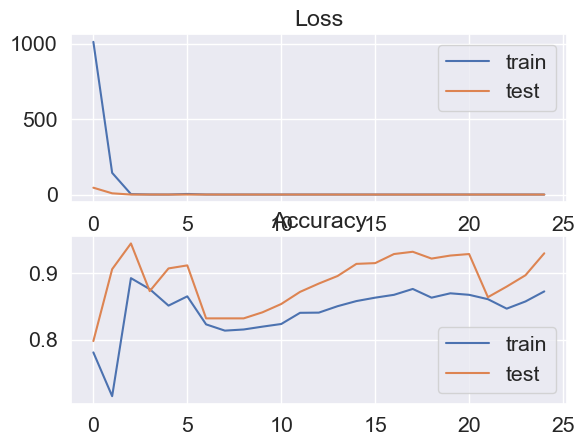

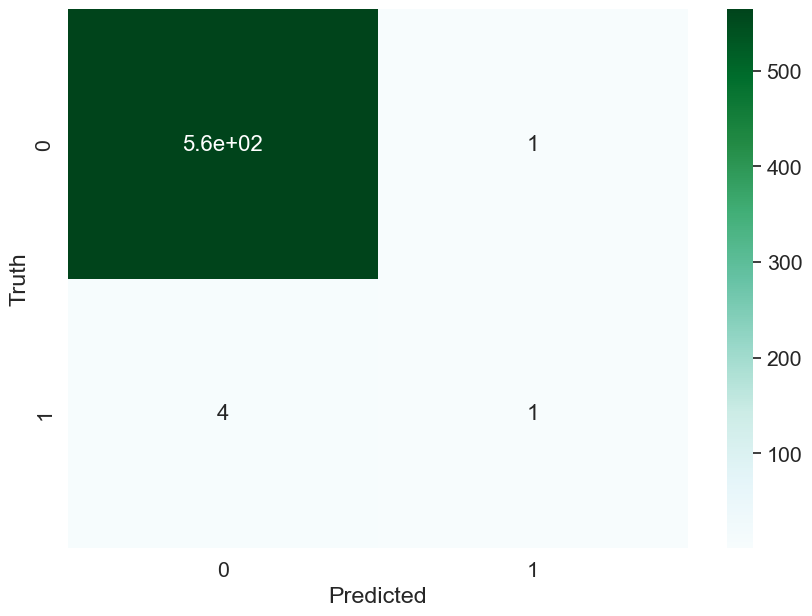

		 Prediction Metrics

Accuracy:	 0.991
Precision:	 0.500
Recall:		 0.200

F1 Score:	 0.286
ROC AUC:	 0.810
Balanced
Accuracy:	 0.599

Sensitivity:	 0.200
Specificity:	 0.998
Geometric Mean:	 0.447


In [42]:
cnn_model1=cnn_model()


In [109]:
from tensorflow.keras import layers, models

input_layer = layers.Input(shape=cnn_model1.input_shape[1:])
prev_layer = input_layer
for layer in cnn_model1.layers:
    prev_layer = layer(prev_layer)

funcmodel = models.Model([input_layer], [prev_layer])

import numpy as np
import tensorflow as tf

# Ensure model has been called before conversion
dummy_input = np.zeros((1,) + cnn_model1.input_shape[1:], dtype=np.float32)
_ = funcmodel(dummy_input)  # run a forward pass to build the model


In [105]:
import sys, types
from tensorflow.keras import Model

# Fake module to satisfy NengoDL import
sys.modules['tensorflow.python.keras.engine.network'] = types.SimpleNamespace(Network=Model)

# Patch Model to add missing _conform_to_reference_input method
if not hasattr(Model, "_conform_to_reference_input"):
    def _conform_to_reference_input(self, x):
        return x
    Model._conform_to_reference_input = _conform_to_reference_input

import nengo_dl
import nengo
import tensorflow as tf
#print(cnn_model1.summary())
sfr = 20
converter = nengo_dl.Converter(
    funcmodel,
    swap_activations={
        tf.keras.activations.relu: nengo.SpikingRectifiedLinear()},
    scale_firing_rates=sfr,
    synapse=0.005,
    inference_only=False,
    allow_fallback=True )

RuntimeError: The layer model_32 has never been called and thus has no defined {attr_name}.

In [106]:
x_train, y_train, x_test, y_test, n_features = datasets()


print("original train ", x_train.shape,"original ytrain label ", y_train.shape)
print("original test ", x_test.shape,"original ytest label ", y_test.shape)
print("\n")

x_train, y_train, x_test, y_test = x_train.to_numpy(), y_train.to_numpy(), x_test.to_numpy(), y_test.to_numpy()

x_train = x_train.reshape((x_train.shape[0], 1, -1))
y_train = y_train.reshape((y_train.shape[0],1,-1))

x_test = x_test.reshape((x_test.shape[0], 1, -1))
y_test = y_test.reshape((y_test.shape[0],1,-1))

#an_array = np.where(an_array > 20, 0, an_array)

y_train=np.where(y_train==1,0.9,y_train)
y_test=np.where(y_test==1,0.9,y_test)

print("timestep train ", x_train.shape,"timestep train label ", y_train.shape)
print("timestep test ", x_test.shape,"timestep test label ", y_test.shape)

original train  (4376, 3197) original ytrain label  (4376,)
original test  (570, 3197) original ytest label  (570,)


timestep train  (4376, 1, 3197) timestep train label  (4376, 1, 1)
timestep test  (570, 1, 3197) timestep test label  (570, 1, 1)


In [107]:
do_training = True #Just a switch to apply training step in SNN. This is according to the documentation of nengo-dl

if do_training:
    with nengo_dl.Simulator(converter.net, minibatch_size=200) as sim:
        # run training
        sim.compile(
            optimizer=tf.optimizers.Adam(0.001),
            loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=[tf.metrics.sparse_categorical_accuracy],
        )
        sim.fit(
            {converter.inputs[converter.model.input]: x_train},
            {converter.outputs[converter.model.output]: y_train},
            validation_data=(
                {converter.inputs[converter.model.input]: x_test},
                {converter.outputs[converter.model.output]: y_test},
            ),
            epochs=10,
        )

        # save the parameters to file
        #sim.save_params("./keras_to_snn_params")

NameError: name 'converter' is not defined

In [108]:
import sys
print(sys.executable)

/Users/ravigarg/anaconda3/envs/nengo39/bin/python
